# Riemann Problems

The code solves Riemann Problems for the relativistic Euler equations

$$
  \partial_t \begin{pmatrix} D \\ S_x \\ S_t \\ \tau \end{pmatrix} + \partial_x \begin{pmatrix} S_x \\ S_x v_x + p \\ S_t v_x \\ (\tau + p) v_x \end{pmatrix} = 0.
$$

For further details on this system of equations, see the [Living Review of Martí and Müller](http://computastrophys.livingreviews.org/Articles/lrca-2015-3/), particularly [section 3.1](http://computastrophys.livingreviews.org/Articles/lrca-2015-3/articlese3.html#x6-190003.1) for the equations and [section 8.5](http://computastrophys.livingreviews.org/Articles/lrca-2015-3/articlese8.html#x11-1150008.5) for the solution of the Riemann Problem.

The initial data is piecewise constant: two states $w_{L, R}$ are specified, each in terms of $w = (\rho_0, v_x, v_t, \epsilon)$, (the specific rest mass density, normal ($x$) and tangential ($t$) velocity components, and the specific internal energy). At $t=0$ the data is set by $w_L$ for $x<0$ and $w_R$ for $x>0$. Each state has associated with it an equation of state (EOS) to close the set of equations: the EOS does not need to be the same for each state.


## Code

To set up a Riemann problem, first set up a left and right state. Each state has its own equation of state. Here we use the first test from the [Test Bench section](http://computastrophys.livingreviews.org/Articles/lrca-2015-3/articlese6.html#x9-690006.3) of the [Living Review](http://computastrophys.livingreviews.org/Articles/lrca-2015-3/):

In [1]:
from r3d2 import eos_defns, State, RiemannProblem

In [2]:
eos = eos_defns.eos_gamma_law(5.0/3.0)
test_1_U_left = State(10.0, 0.0, 0.0, 2.0, eos, label="L")
test_1_U_right = State(1.0, 0.0, 0.0, 1.5e-6, eos, label="R")
test_1_rp = RiemannProblem(test_1_U_left, test_1_U_right)

The Riemann Problem will produce output directly in the notebook:

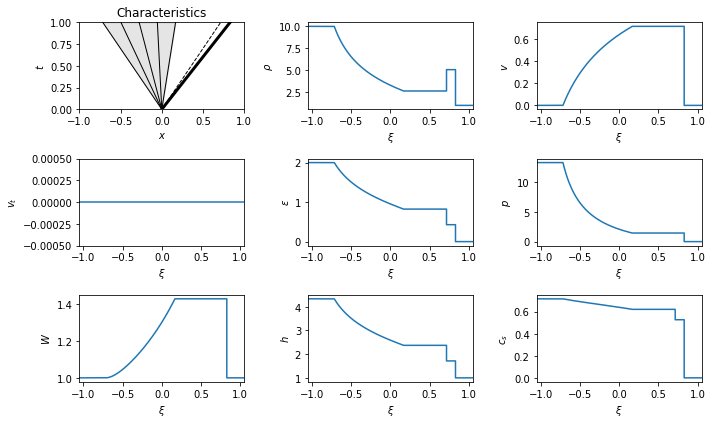

In [3]:
test_1_rp

This output should be interpreted as follows. First it displays the initial states ${\bf U}_{L, R}$. It then gives the resulting wave pattern: in this case a left going rarefaction, a contact, and a right going shock. It then gives the pressure $p_*$ in the central states (the pressure and normal velocity do not jump across the contact). Next it gives the speeds of each wave. Finally, it gives the constant states between the left wave and the contact ${\bf U}_{*_L}$ and between the contact and the right state ${\bf U}_{*_R}$.

We can also display the output graphically in the notebook:

In [4]:
from IPython.display import display_png

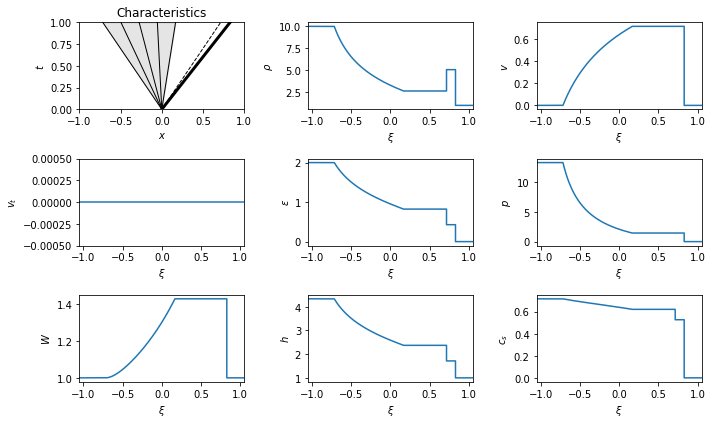

In [5]:
display_png(test_1_rp)

The first (top left) plot is the wave pattern in the $(x, t)$ plane. Rarefactions are shaded with thin solid lines. Contacts are dashed lines. Discontinuities such as shocks are thick solid lines.

All the other plots show a single quantity as a function of space at a fixed time, or equivalently as a function of the characteristic variable $\xi = x / t$.

### Changing equation of state

There is no need for the two states to have the same equation of state. For example:

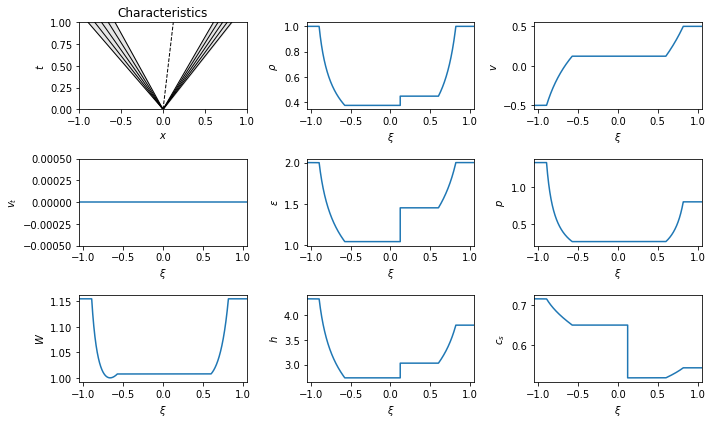

In [6]:
eos_air = eos_defns.eos_gamma_law(1.4)
U_vary_eos_L = State(1.0, -0.5, 0.0, 2.0, eos, label="L")
U_vary_eos_R = State(1.0, +0.5, 0.0, 2.0, eos_air, label="R")
test_vary_eos_rp = RiemannProblem(U_vary_eos_L, U_vary_eos_R)
test_vary_eos_rp

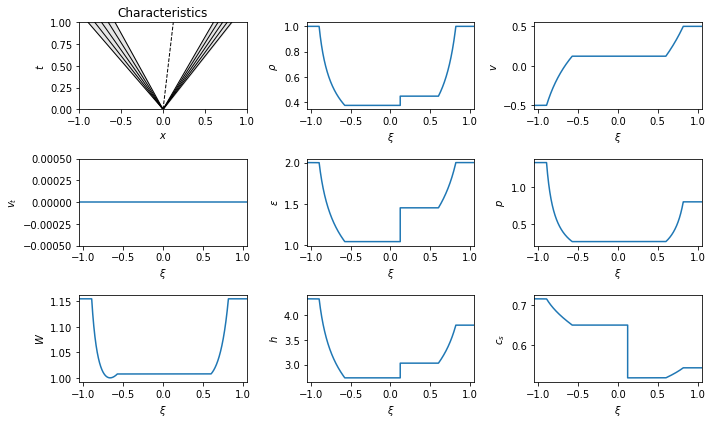

In [7]:
display_png(test_vary_eos_rp)

### Reactive problems

To include a reaction, make the equation of state of at least one of the states be a reactive EOS:

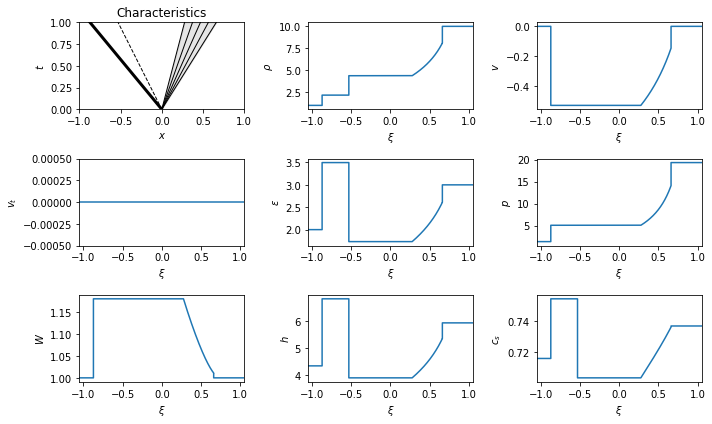

In [8]:
q_unburnt = 0.1
gamma = 5/3
Cv = 1.0
t_ignition = 2
eos_burnt = eos_defns.eos_gamma_law(gamma)
eos_unburnt = eos_defns.eos_gamma_law_react(gamma, q_unburnt, Cv, t_ignition, eos_burnt)
U_reactive_left = State(1, 0, 0, 2, eos_burnt)
U_reactive_right = State(10, 0, 0, 3, eos_unburnt)
test_reactive_rp = RiemannProblem(U_reactive_left, U_reactive_right)
test_reactive_rp

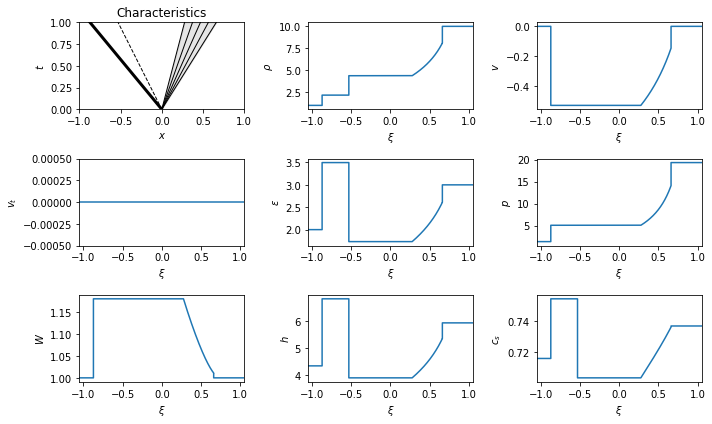

In [9]:
display_png(test_reactive_rp)